# Assignment 2

## Part 2

> Create a word-cloud for each coast according to the novel TF-TR method. Feel free to make it as fancy as you like. Explain your process and comment on your results.

Import necessary modules and libraries.

In [1]:
from nltk.corpus import PlaintextCorpusReader
from nltk.text import Text
from nltk import FreqDist
import re
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Read text files from 'westcoasttexts' and 'eastcoasttexts' directories.

In [2]:
wordlist_west = PlaintextCorpusReader('westcoasttexts', '.*\.txt')
wordlist_east = PlaintextCorpusReader('eastcoasttexts', '.*\.txt')

Convert word lists to NLTK Text objects.

In [3]:
text_west = Text(wordlist_west.words())
text_east = Text(wordlist_east.words())

Define a function to remove punctuation from tokens. The function replaces non-alphabetic and non-numeric characters with an empty string.

In [4]:
def remove_punctuation(token):
    pattern = re.compile(r'[^a-zA-Z0-9]')
    
    return pattern.sub('', token)

Generate token lists for West and East Coast texts. Remove punctuation and convert tokens to lowercase.

In [5]:
tokens_west = [remove_punctuation(w.lower()) for w in text_west.tokens if remove_punctuation(w.lower()) != '']
tokens_east = [remove_punctuation(w.lower()) for w in text_east.tokens if remove_punctuation(w.lower()) != '']

Calculate frequency distributions for cleaned tokens.

In [6]:
tf_west = FreqDist(tokens_west)
tf_east = FreqDist(tokens_east)

Define a function to compute TF-TR dictionaries. The function aggregates tokens from both frequency distributions into a set and calculates the TF-TR for each token. It stores the calculated TF-TR in a dictionary and returns this dictionary.

In [7]:
def compute_tf_tr(fdist1, fdist2, c):
    tf_tr = {}
    
    all_tokens = set(list(fdist1.keys()) + list(fdist2.keys()))

    for token in all_tokens:
        tf1 = fdist1.get(token, 0)
        tf2 = fdist2.get(token, 0)
        
        if tf1 > 0:
            w1 = tf1 / (tf2 + c)
            tf_tr[token] = tf1 * w1

    return tf_tr

Generate TF-TR dictionaries for West and East Coast texts.

In [8]:
tf_tr_west = compute_tf_tr(tf_west, tf_east, 20)
tf_tr_east = compute_tf_tr(tf_east, tf_west, 20)

Define a function to convert TF-TR dictionaries to strings. The function returns a weighted concatenation of the TF-TR tokens, each token being repeated according to the ceiling of its TF-TR value.

In [9]:
def compute_tf_tr_string(tf_tr):

    tf_tr_string = ''

    for token in tf_tr:
        for i in range(math.ceil(tf_tr[token])):
            tf_tr_string += token + " "

    return tf_tr_string

Generate strings based on the TF-TR dictionaries.

In [10]:
tf_tr_string_west = compute_tf_tr_string(tf_tr_west)
tf_tr_string_east = compute_tf_tr_string(tf_tr_east)

Generate word clouds for West and East Coast texts.

In [11]:
wordcloud_west = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(tf_tr_string_west)
wordcloud_east = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='plasma').generate(tf_tr_string_east)

Display generated word clouds.

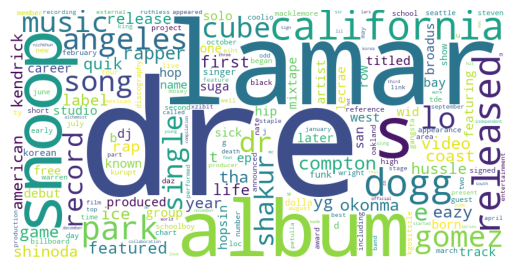

In [12]:
plt.imshow(wordcloud_west)
plt.axis("off")
plt.show()

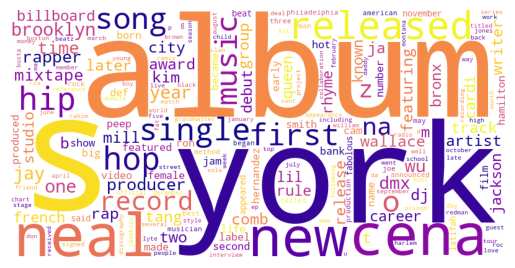

In [13]:
plt.imshow(wordcloud_east)
plt.axis("off")
plt.show()

I find that the resulting word clouds make sense. The West Coast word cloud prominently features key figures from the West Coast hip-hop scene, while conversely, the East Coast word cloud does the same for its own scene. However, both include universal terms such as 'album,' which lack regional specificity. Ideally, the word clouds would exclusively contain terms that are pertinent to their respective coasts. This suggests that the TF-TR method may not be the most effective for distinguishing between coast-specific and non-coast-specific terms.

> For each coast, what are the 5 words with the highest TR scores? Comment on your result.

Define a function to compute TR dictionaries. The function aggregates tokens from both frequency distributions into a set and calculates the TR for each token. It stores the calculated TR in a dictionary and returns this dictionary.

In [14]:
def compute_tr(fdist1, fdist2, c):
    tr = {}
    
    all_tokens = set(list(fdist1.keys()) + list(fdist2.keys()))

    for token in all_tokens:
        tf1 = fdist1.get(token, 0)
        tf2 = fdist2.get(token, 0)
        
        if tf1 > 0:
            w1 = tf1 / (tf2 + c)
            tr[token] = w1

    return tr

Generate TR dictionaries for West and East Coast texts.

In [15]:
tr_west = compute_tr(tf_west, tf_east, 20)
tr_east = compute_tr(tf_east, tf_west, 20)

Sort and display the top five TR values for West and East Coast texts.

In [16]:
sorted(list(tr_west.items()), key=lambda x: x[1], reverse=True)[:5]

[('gomez', 7.043478260869565),
 ('lamar', 6.323076923076923),
 ('okonma', 5.3),
 ('cube', 4.9523809523809526),
 ('shinoda', 4.857142857142857)]

In [17]:
sorted(list(tr_east.items()), key=lambda x: x[1], reverse=True)[:5]

[('neal', 15.37037037037037),
 ('cena', 14.064516129032258),
 ('dmx', 9.346153846153847),
 ('brooklyn', 8.444444444444445),
 ('wallace', 8.0)]

I find that the resulting lists make sense. On the West Coast, 'Gomez' could reflect the area's larger Hispanic population. 'Lamar,' 'Okonma,' and 'Cube' likely refer to major hip-hop artists Kendrick Lamar, Tyler, the Creator, and Ice Cube—all from California. I can't think of a reason why 'Shinoda' is included, as Mike Shinoda is not typically associated with hip-hop music.

The East Coast list is less straightforward. 'DMX' and 'Wallace' likely refer to major hip-hop artists DMX and The Notorious B.I.G. (Christopher Wallace)—both from New York. 'Brooklyn' of course refers to one of the five major boroughs of New York City and has historically been a key cultural hub for hip-hop music. I can't think of a reason why either 'Neal' and 'Cena' are included. Perhaps these are common East Coast surnames.

## Part 3

> In your own words, explain what the measure "modularity" is, and the intuition behind the formula you use to compute it. 

Network modularity indicates how well a network is divided into communities. High modularity suggests that the network separates effectively into distinct communities, whereas low modularity suggests the opposite.

> Find communities in the network, and explain how you chose to identify the communities: Which algorithm did you use and how does it work?

Import necessary modules and libraries.

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

Read NetworkX graph file from directory.

In [19]:
G = nx.read_graphml("/Users/oskarhibbert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studies/MSc Sem 1/02805 Social Graphs and Interactions/Week 4/G_w4.graphml").to_undirected()

Isolate the giant component in the hip-hop artists network by removing all nodes that are not part of it.

In [20]:
connected_components_G = nx.connected_components(G)
largest_cc_G = max(connected_components_G, key=len)
nodes_to_remove = set(G.nodes()) - set(largest_cc_G)

G.remove_nodes_from(nodes_to_remove)

Define a function to compute the modularity of a NetworkX graph given its community structure.

In [21]:
def compute_modularity(G, communities):
    m = G.number_of_edges()
    modularity = 0
    
    for community in communities:
        for i in community:
            for j in community:
                Aij = 1 if G.has_edge(i, j) else 0
                ki = G.degree[i]
                kj = G.degree[j]
                modularity += Aij - (ki * kj) / (2 * m)
    
    return modularity / (2 * m)

Define a function to perform clustering on a NetworkX graph until *n* disjoint clusters are formed. The function uses edge betweenness centrality to identify and remove the most central edges in the graph, thereby increasing the number of clusters.

In [22]:
def clustering(G, n, verbose=False):
    current_clusters = nx.number_connected_components(G)

    while current_clusters < n:
        edge_betweenness = nx.edge_betweenness_centrality(G).items()
        edge_to_remove = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]

        G.remove_edge(*edge_to_remove)
        
        current_clusters = nx.number_connected_components(G)

        if verbose:
            print(f"Deleted edge: {edge_to_remove}, current clusters: {current_clusters}")
    
    if verbose:
        node_colors = []

        for _, attributes in G.nodes(data=True):
            if attributes['coast'] == "W":
                node_colors.append('red')
            if attributes['coast'] == "E":
                node_colors.append('blue')
        
        node_degrees = [G.degree[node] for node in G]

        plt.figure(figsize=(10, 6))
        nx.draw(G, node_size=node_degrees, node_color=node_colors, width=0.5, edge_color="lightgray")
        plt.show()

    communities = [list(c) for c in nx.connected_components(G)]
    modularity = compute_modularity(G, communities)
    
    return communities, modularity

Perform clustering on the hip-hop artists network.

Deleted edge: ('Brother Marquis', 'Jay-Z'), current clusters: 2
Deleted edge: ('Snoop Dogg', 'MC Lars'), current clusters: 2
Deleted edge: ('Grieves', 'MC Lars'), current clusters: 3
Deleted edge: ('Sage Francis', 'Saul Williams'), current clusters: 3
Deleted edge: ('Eyenine', 'Ghostface Killah'), current clusters: 3
Deleted edge: ('Eyenine', 'RZA'), current clusters: 3
Deleted edge: ('Eyenine', 'GZA'), current clusters: 3
Deleted edge: ('Eyenine', 'U-God'), current clusters: 3
Deleted edge: ('Esoteric', 'M-Dot'), current clusters: 4
Deleted edge: ('Aceyalone', 'Macklemore'), current clusters: 4
Deleted edge: ('Kid Capri', 'Sweet Tee'), current clusters: 5
Deleted edge: ('DJ Skee', 'DJ Whoo Kid'), current clusters: 6
Deleted edge: ('Dumbfoundead', 'Too Short'), current clusters: 6
Deleted edge: ('Junglepussy', 'Busta Rhymes'), current clusters: 6
Deleted edge: ('Dai Burger', 'Lil Mama'), current clusters: 6
Deleted edge: ('Junglepussy', "Lil' Kim"), current clusters: 6
Deleted edge: ('

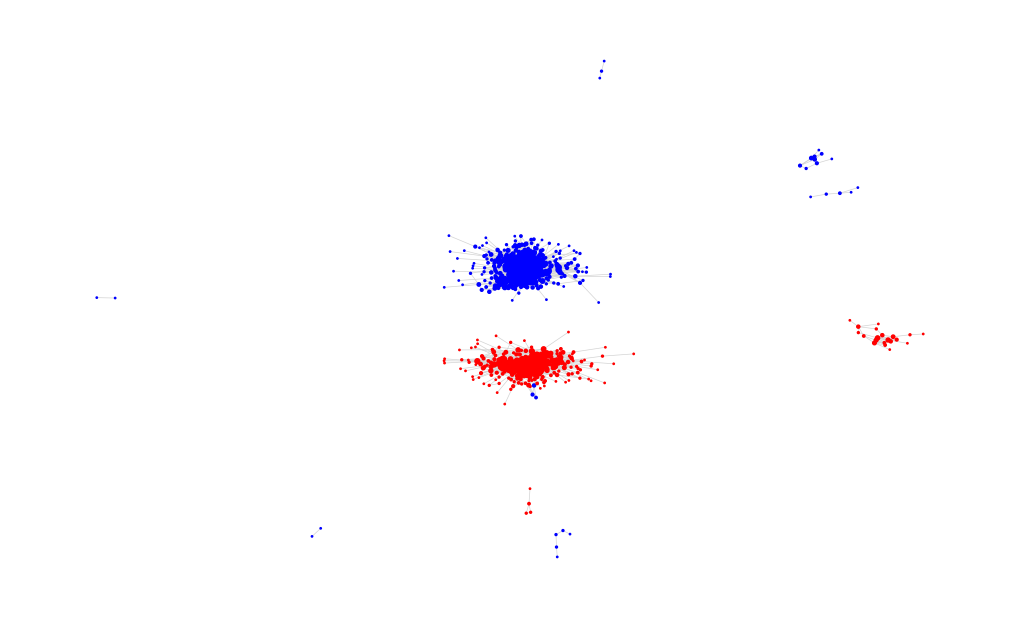

In [23]:
communities_G, modularity_G = clustering(G, 10, True)

I chose to use the Girvan-Newman community detection algorithm to systematically remove edges from the graph in order to isolate distinct communities within the network as disjoint clusters. The algorithm works by iteratively removing the edge in the network with the highest betweenness centrality score. A high betweenness centrality score indicates that the edge serves as a "bridge" between two disparate parts of the network. This process repeats until the network has been divided into *n* disjoint clusters.

> Comment on your results. How many communities did you find in total?

Playing around with the above implementation, it becomes clear there are two major communities in the hip-hop artists network: West and East Coast hip-hop artists.

> Compute the value of modularity with the partition created by the algorithm.

In [24]:
modularity_G

0.46862368545931327

> Plot and/or print the distribution of community sizes (whichever makes most sense). Comment on your result.

Sort and display the community sizes.

In [25]:
community_sizes = sorted([len(community) for community in communities_G], reverse=True)

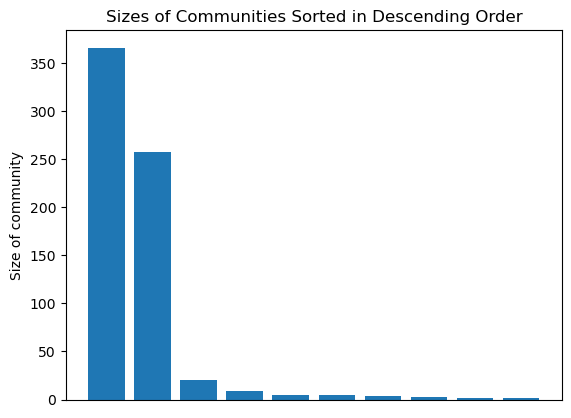

In [26]:
plt.style.use('default')
plt.bar(range(len(community_sizes)), community_sizes)
plt.title('Sizes of Communities Sorted in Descending Order')
plt.ylabel('Size of community')
plt.xticks([])
plt.show()

I believe that my original hip-hop artists network is incorrect because the network doesn't appear to contain all the true connections between West and East Coast hip-hop artists. As a result, the identified communities are incredibly distinct.

> Now, partition your rappers into two communities based on which coast they represent.
> * What is the modularity of this partition? Comment on the result.

Read NetworkX graph file from directory.

In [27]:
G = nx.read_graphml("/Users/oskarhibbert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studies/MSc Sem 1/02805 Social Graphs and Interactions/Week 4/G_w4.graphml").to_undirected()

Separate West and East Coast nodes based on their 'coast' node property.

In [28]:
west_nodes = [n for n, attr in G.nodes(data=True) if attr['coast'] == 'W']
east_nodes = [n for n, attr in G.nodes(data=True) if attr['coast'] == 'E']

Compute the modularity between West and East Coast hip-hop artists in the hip-hop artists network.

In [29]:
nx.community.modularity(G, [west_nodes, east_nodes])

0.4485895663960854

The hip-hop artists network has a positive modularity value, suggesting that it is well partitioned into communities.